In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
import seaborn as sns

In [ ]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


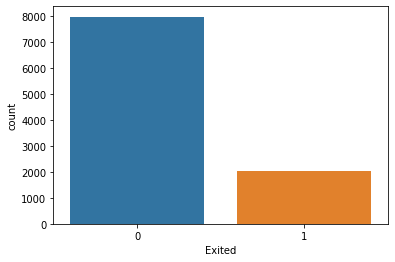

In [ ]:
sns.countplot(df.Exited)

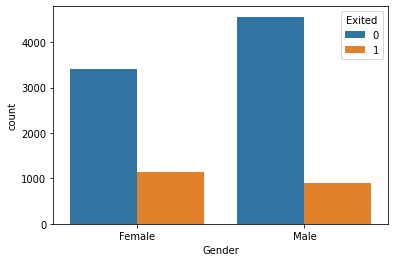

In [ ]:
sns.countplot(x='Gender',hue='Exited',data=df)

In [ ]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


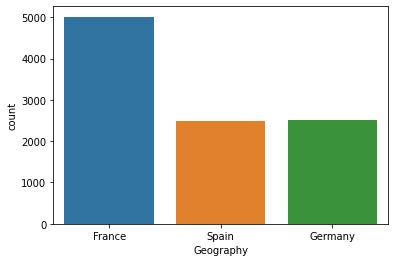

In [ ]:
sns.countplot(df.Geography)

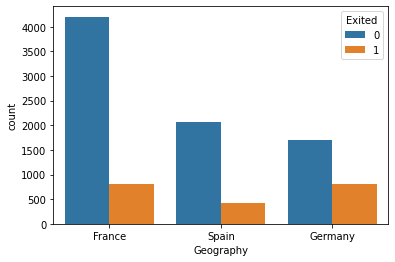

In [ ]:
sns.countplot(x='Geography',hue='Exited',data=df)

In [ ]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

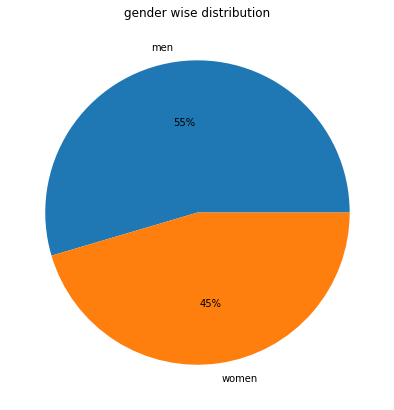

In [ ]:
total=df.Gender.value_counts()[0]+df.Gender.value_counts()[1]
per_man_data=(df.Gender.value_counts()[0]/total)*100
per_woman_data=(df.Gender.value_counts()[1]/total)*100
plt.figure(figsize=(7,7))
plt.pie([per_man_data,per_woman_data],labels=["men","women"],autopct='%1.0f%%')
plt.title('gender wise distribution')
plt.show()

In [ ]:
df.groupby('Gender')['Age'].mean()

Gender
Female    39.238389
Male      38.658237
Name: Age, dtype: float64

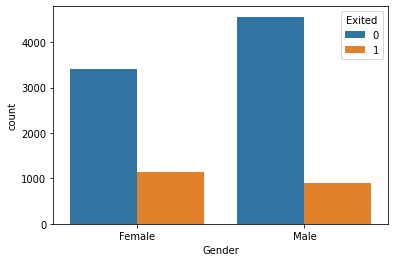

In [ ]:
sns.countplot(x='Gender',hue='Exited',data=df)

In [ ]:
df['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [ ]:
df.groupby('Gender')['HasCrCard'].value_counts()

Gender  HasCrCard
Female  1            3192
        0            1351
Male    1            3863
        0            1594
Name: HasCrCard, dtype: int64

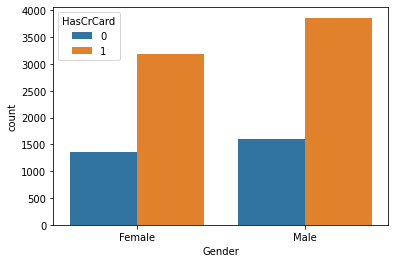

In [ ]:
sns.countplot(x='Gender',hue='HasCrCard',data=df)

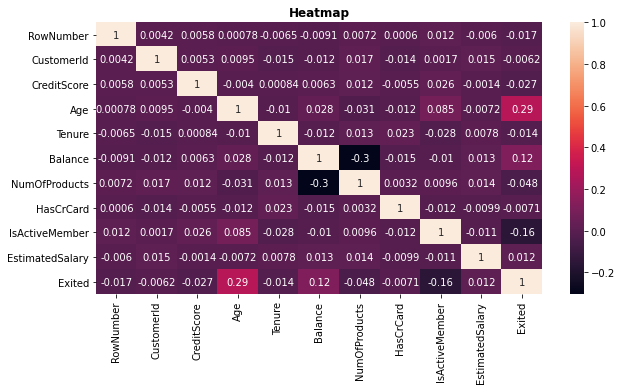

In [ ]:


plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True)
plt.title("Heatmap", fontweight = "bold")
plt.show()

In [ ]:
df['Balance'].mean()

76485.88928799961

In [ ]:
df.groupby('Gender')['Balance'].mean()

Gender
Female    75659.369139
Male      77173.974506
Name: Balance, dtype: float64

In [ ]:
df.groupby('Gender')['IsActiveMember'].value_counts()

Gender  IsActiveMember
Female  1                 2284
        0                 2259
Male    1                 2867
        0                 2590
Name: IsActiveMember, dtype: int64

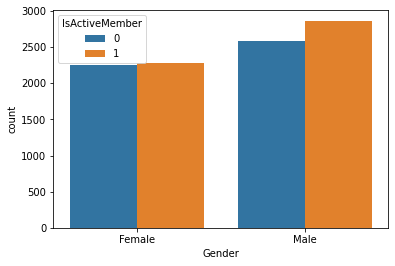

In [ ]:
sns.countplot(x='Gender',hue='IsActiveMember',data=df)

In [ ]:
df.groupby('Gender')['HasCrCard'].value_counts()

Gender  HasCrCard
Female  1            3192
        0            1351
Male    1            3863
        0            1594
Name: HasCrCard, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
ftr_list=['Gender','Geography']
encoder=LabelEncoder()
for i in ftr_list:
  df[i]=encoder.fit_transform(df[i])
  print(encoder.classes_)


df

['Female' 'Male']
['France' 'Germany' 'Spain']


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
from sklearn.model_selection import train_test_split
train_df,test_df=train_test_split(df,test_size=0.2,random_state=5)
print(train_df.shape)
print(test_df.shape)

(8000, 14)
(2000, 14)


In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
def print_model_scores(model,data,predictor,target):
  model.fit(data[predictor],data[target])
  predictions=model.predict(data[predictor])
  accuracy=accuracy_score(predictions,data[target])
  print('Accuracy: %s'%'{0:2}'.format(accuracy))

KeyboardInterrupt: 

In [ ]:
model=RandomForestClassifier(n_estimators=10)
target_var=["Exited"]
predictor_var=['Age','Geography','Balance','EstimatedSalary','HasCrCard']
print_model_scores(model,train_df,predictor_var,target_var)

Accuracy: 0.976625


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
Age=60
Geography=1
Balance=70000
EstimatedSalary=112540
HasCrCard=0 
inp=[Age,Geography,Balance,EstimatedSalary,HasCrCard]
inp=np.array(inp).reshape((1,-1))
output=model.predict(inp)
print(output)

[1]


In [ ]:
pd.Series(index=predictor_var,data=model.feature_importances_)

Age                0.291887
Geography          0.035775
Balance            0.252691
EstimatedSalary    0.400542
HasCrCard          0.019105
dtype: float64

Majority of employees are from France,Men are more than Females
Hence Our analysis says a person whoes Estimated Salary,
Balance  and age are high will not leave the service 
